### Importing necessary libraries (torch, matplotlib)

In [66]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as opt
import torch.nn as nn
import os
import cv2
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Path to training and testing datasets

In [58]:
PATH = "C:/Users/Ato/Documents/Programming/Python/catdog/src/datasets"
train_path = PATH + "/train"
dogs_path = train_path + "/dogs"
cats_path = train_path + "/cats"
test_path = PATH + "/test1"

## Preprocessing and Observations

#### Entries and number of samples of each class

In [59]:
print(len(os.listdir(dogs_path)))
print(len(os.listdir(cats_path)))
print(type(os.listdir(dogs_path)))
print(os.listdir(dogs_path)[20])
print(os.listdir(cats_path)[20])




12500
12500
<class 'list'>
dog.10014.jpg
cat.10014.jpg


- Taking a look at the filenames, it is possible extracting the name and label with ease with:

In [62]:
filenames = os.listdir(dogs_path) + os.listdir(cats_path)
labels = [filename.split('.')[0] for filename in filenames]

In [61]:
raw_data = {'filename': filenames, 'label': labels}
df = pd.DataFrame(raw_data)


In [48]:
df.head()

,filename,label
0,dog.0.jpg,dog
1,dog.1.jpg,dog
2,dog.10.jpg,dog
3,dog.100.jpg,dog
4,dog.1000.jpg,dog


In [49]:
df.describe()

,filename,label
count,25000,25000
unique,25000,2
top,dog.0.jpg,dog
freq,1,12500


#### Checking balance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

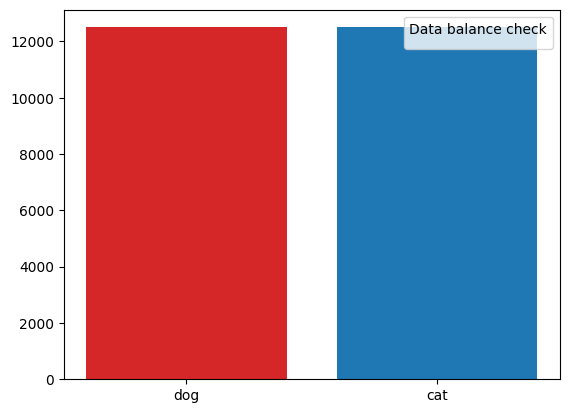

In [64]:
fig, ax = plt.subplots()
bar_labels = df['label'].value_counts().index
counts = df['label'].value_counts().values
bar_colors = ['tab:red', 'tab:blue']

ax.bar(bar_labels, counts, color=bar_colors)
ax.legend(title="Data balance check")

plt.show

The data is balanced! Let's continue.

## Analizing dimensions, shapes, sizes,...

- Take a smaller sample but big enough to contain useful information. sample = 5000

In [76]:
import cv2
from PIL import Image

In [67]:
sample_size = 5000
sample_images = df['filename'].sample(sample_size).to_list()


In [91]:
test = cv2.imread(sample_images[0], )
assert test is not None, "error holymolly"



AssertionError: error holymolly

In [94]:
width = []
height = []
channels = [] # channels

for filename in sample_images:
  if filename in os.listdir(dogs_path):
    image = cv2.imread(os.path.join(dogs_path, filename), 1)

  elif filename in os.listdir(cats_path):
    image = cv2.imread(os.path.join(cats_path, filename), 1)
  else:
    print("File not found in training set")

  width.append(image.shape[1])
  height.append(image.shape[0])
  channels.append(image.shape[2])




In [98]:
sample_dimensions = pd.DataFrame({
  'width':width,
  'height':height,  
  'channels':channels
})

sample_dimensions.head()

,width,height,channels
0,499,375,3
1,499,433,3
2,499,382,3
3,463,499,3
4,500,422,3


In [99]:
sample_dimensions['aspect ratio'] = sample_dimensions['width']/sample_dimensions['height']

In [100]:
sample_dimensions.head()

,width,height,channels,aspect ratio
0,499,375,3,1.330667
1,499,433,3,1.152425
2,499,382,3,1.306283
3,463,499,3,0.927856
4,500,422,3,1.184834
